<a href="https://colab.research.google.com/github/gulabpatel/ML_Algos/blob/main/AdaboostClassifier/AdaboostClassifier_Telecom_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Problem

***Video walkthrough of the notebook*** : https://www.youtube.com/watch?v=ehS6tmQveA4&t=1602s

A telecommunication company is facing dip in revenue due to customer attrition and was looking for ways to tackle the issue. 

- Analysis of the current churn data and look for patterns
- Possible churn prediction system 

# Why solve using data science?

Not all problems needs to be solved using ML/DL techniques!

Justification in this use case:

- Customer churn does not happen with specific set of factors.  Factors may overlap or there many too many resons for the churn.

- Scalability: As the organization gets more customers having ML solutions to handle them will be lot better than doing manual analysis.

With these justifications, lets get our customers data and understand.

# Advantages of having a churn prediction system

Client can react in time and retain the customers by making a special offer according to the preference

# Dataset Recieved

Telecom users dataset
https://www.kaggle.com/radmirzosimov/telecom-users-dataset

In [1]:
!pip install plotly==4.14.3

     |████████████████████████████████| 13.2MB 262kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

In [3]:
path_to_file = 'https://raw.githubusercontent.com/gulabpatel/Biasness/master/telecom_users.csv'

In [4]:
# Read the input data
df_data = pd.read_csv(path_to_file)

In [5]:
# Take first few rows
df_data.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


# Data Glossary

- customerID - customer id
- gender - client gender (male / female)
- SeniorCitizen - is the client retired (1, 0)
- Partner - is the client married (Yes, No)
- tenure - how many months a person has been a client of the company
- PhoneService - is the telephone service connected (Yes, No)
- MultipleLines - are multiple phone lines connected (Yes, No, No phone service)
- InternetService - client's Internet service provider (DSL, Fiber optic, No)
- OnlineSecurity - is the online security service connected (Yes, No, No internet service)
- OnlineBackup - is the online backup service activated (Yes, No, No internet service)
- DeviceProtection - does the client have equipment insurance (Yes, No, No internet service)
- TechSupport - is the technical support service connected (Yes, No, No internet service)
- StreamingTV - is the streaming TV service connected (Yes, No, No internet service)
- StreamingMovies - is the streaming cinema service activated (Yes, No, No internet service)
- Contract - type of customer contract (Month-to-month, One year, Two year)
- PaperlessBilling - whether the client uses paperless billing (Yes, No)
- PaymentMethod - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges - current monthly payment
- TotalCharges - the total amount that the client paid for the services for the entire time
- Churn - whether there was a churn (Yes or No)

# Exploratory Data Analysis

In [6]:
# Remove ids from the analysis
df_data = df_data.drop(columns=['Unnamed: 0', 'customerID'])

In [7]:
df_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [8]:
# Let's see of we have any missing values
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   object 
 1   SeniorCitizen     5986 non-null   int64  
 2   Partner           5986 non-null   object 
 3   Dependents        5986 non-null   object 
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   object 
 6   MultipleLines     5986 non-null   object 
 7   InternetService   5986 non-null   object 
 8   OnlineSecurity    5986 non-null   object 
 9   OnlineBackup      5986 non-null   object 
 10  DeviceProtection  5986 non-null   object 
 11  TechSupport       5986 non-null   object 
 12  StreamingTV       5986 non-null   object 
 13  StreamingMovies   5986 non-null   object 
 14  Contract          5986 non-null   object 
 15  PaperlessBilling  5986 non-null   object 
 16  PaymentMethod     5986 non-null   object 


#### From the data gloassary, we can observe that the `TotalCharges` is a number but it is in `object` type. Let's analyze that.

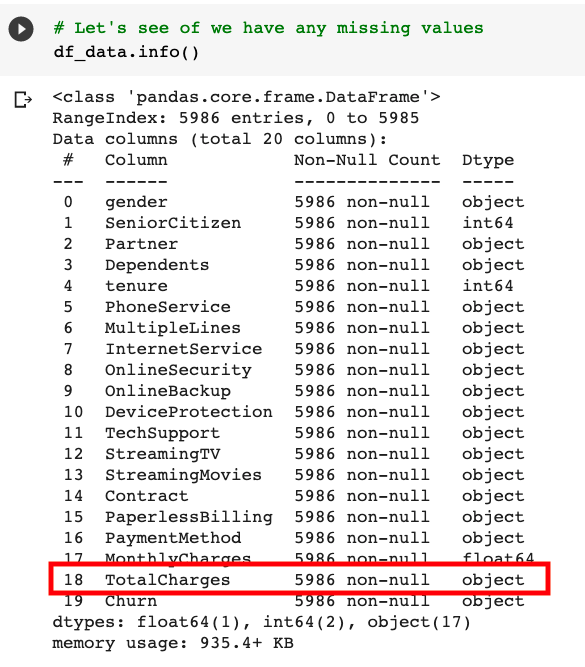

In [9]:
df_data['TotalCharges'].value_counts()

20.2       10
           10
19.75       8
19.55       7
19.9        6
           ..
1025.15     1
3582.4      1
449.3       1
2320.8      1
5730.15     1
Name: TotalCharges, Length: 5611, dtype: int64

Looks like there are about 10 blank values in the `TotalCharges` field. Let's update the values.

In [10]:
# Observe that TotalCharges have blank values
print('Before removing blank values')
print(df_data[df_data['TotalCharges'] == ' '].index)
df_data['TotalCharges'] = df_data['TotalCharges'].replace(r'^\s*$', 0, regex=True)
print('After removing blank values')
print(df_data[df_data['TotalCharges'] == ' '].index)
df_data['TotalCharges'] = df_data['TotalCharges'].astype(float)

Before removing blank values
Int64Index([356, 634, 2771, 3086, 3255, 4326, 5375, 5382, 5695, 5951], dtype='int64')
After removing blank values
Int64Index([], dtype='int64')


In [11]:
# Let's review the data information
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   object 
 1   SeniorCitizen     5986 non-null   int64  
 2   Partner           5986 non-null   object 
 3   Dependents        5986 non-null   object 
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   object 
 6   MultipleLines     5986 non-null   object 
 7   InternetService   5986 non-null   object 
 8   OnlineSecurity    5986 non-null   object 
 9   OnlineBackup      5986 non-null   object 
 10  DeviceProtection  5986 non-null   object 
 11  TechSupport       5986 non-null   object 
 12  StreamingTV       5986 non-null   object 
 13  StreamingMovies   5986 non-null   object 
 14  Contract          5986 non-null   object 
 15  PaperlessBilling  5986 non-null   object 
 16  PaymentMethod     5986 non-null   object 


## Business Problem to Data Science Questions

Dolores, the client, was expecting to analysze the current data to understand what went wrong and correct. Here are the questions the team came up with. 

_NOTE_: As we present to the stakeholders, questions willget updated.

- How gender, partner, and dependents are related to chrun?
- Are we facing churn with customers with longer tenure?
- Are we having issues with phone and internet services?
- Does customers opted for tech support stayed for longer tenure with less churn?
- Did customers monthly charge and total charge relate with churn?
- Do customers opted for streaming face issue with the service?
- Which contract do customers prefer in order to stay with the business?

## Let's visualize

We will be using `Plotly` and `Seaborn` for the visualization pupose. `Pandas` used for analysis.

### How gender, partner, and dependents are related to chrun?

In [12]:
fig = px.treemap(df_data.groupby(['gender', 'Partner', 'Dependents','Churn']).size().reset_index(name='count'), 
                 path=['gender', 'Partner', 'Dependents','Churn'], values='count',
                 color='Churn', title='How gender, partner, and dependents are related to chrun?')
fig.show()

### Are we facing churn with customers with longer tenure?

In [13]:
fig = px.histogram(df_data.groupby(['tenure', 'Churn']).size().reset_index(name='count'), 
                   x="tenure", y='count', color="Churn", marginal="rug", color_discrete_map={"Yes": "#E45756", "No": "#1CBE4F"},
                   title='Are we facing churn with customers with longer tenure?')
fig.show()

### Are we having issues with phone and internet services?

In [14]:
fig = px.sunburst(df_data.groupby(['Churn', 'PhoneService', 'InternetService']).size().reset_index(name='count'), 
                  path=['Churn', 'PhoneService', 'InternetService'], values='count', title='Are we having issues with phone and internet services?')
fig.show()

### Does customers opted for tech support stayed for longer tenure with less churn?

In [15]:
df_tech_yes = df_data[df_data['TechSupport'] == 'Yes']
df_tech_no = df_data[df_data['TechSupport'] == 'No']

### Customers getting tech support

In [16]:
fig = px.histogram(df_tech_yes.groupby(['tenure', 'Churn']).size().reset_index(name='count'), 
                   x="tenure", y='count', color="Churn", marginal="rug", color_discrete_map={"Yes": "#E45756", "No": "#1CBE4F"},
                   title='Statistics of customers opted for tech support')
fig.show()

### Customers not getting tech support

In [17]:
fig = px.histogram(df_tech_no.groupby(['tenure', 'Churn']).size().reset_index(name='count'), 
                   x="tenure", y='count', color="Churn", marginal="rug", color_discrete_map={"Yes": "#E45756", "No": "#1CBE4F"},
                   title='Statistics of customers opted out of the tech support')
fig.show()

## Did customers monthly charge and total charge relate with churn?

[Text(0.5, 1.0, 'Did customers monthly charge and total charge relate with churn?')]

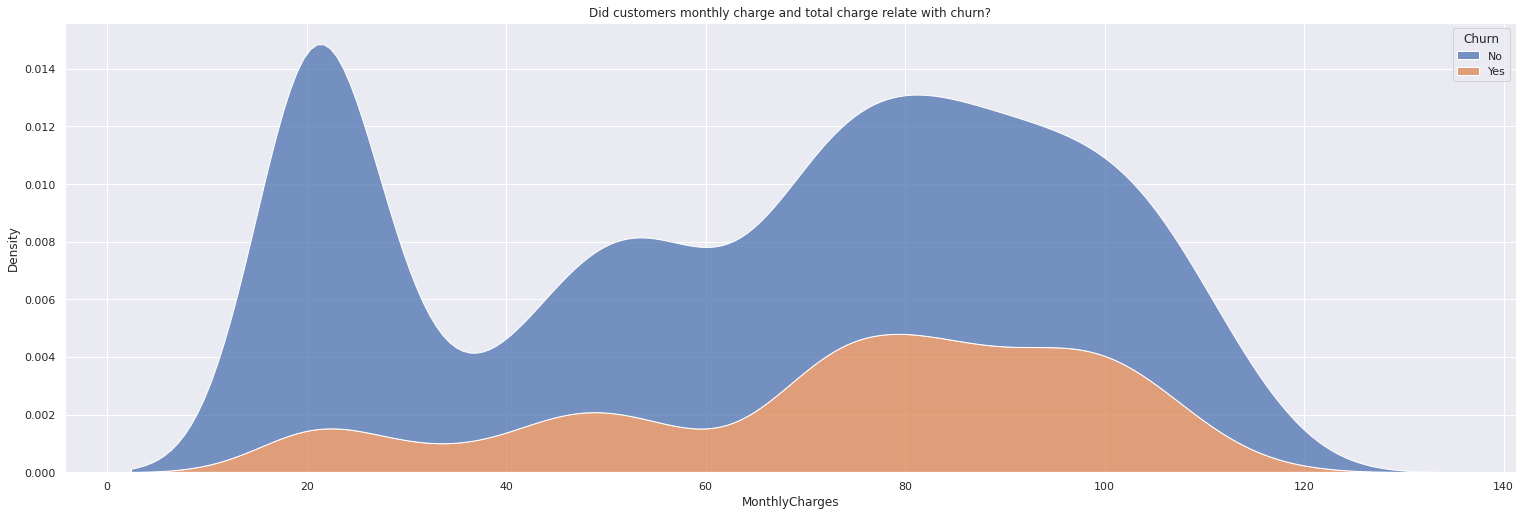

In [18]:
sns.set(rc={'figure.figsize':(26,8.27)})
sns.kdeplot(data=df_data, x="MonthlyCharges", hue="Churn", multiple="stack").set(title='Did customers monthly charge and total charge relate with churn?')

[Text(0.5, 1.0, 'Did customers total charge and total charge relate with churn?')]

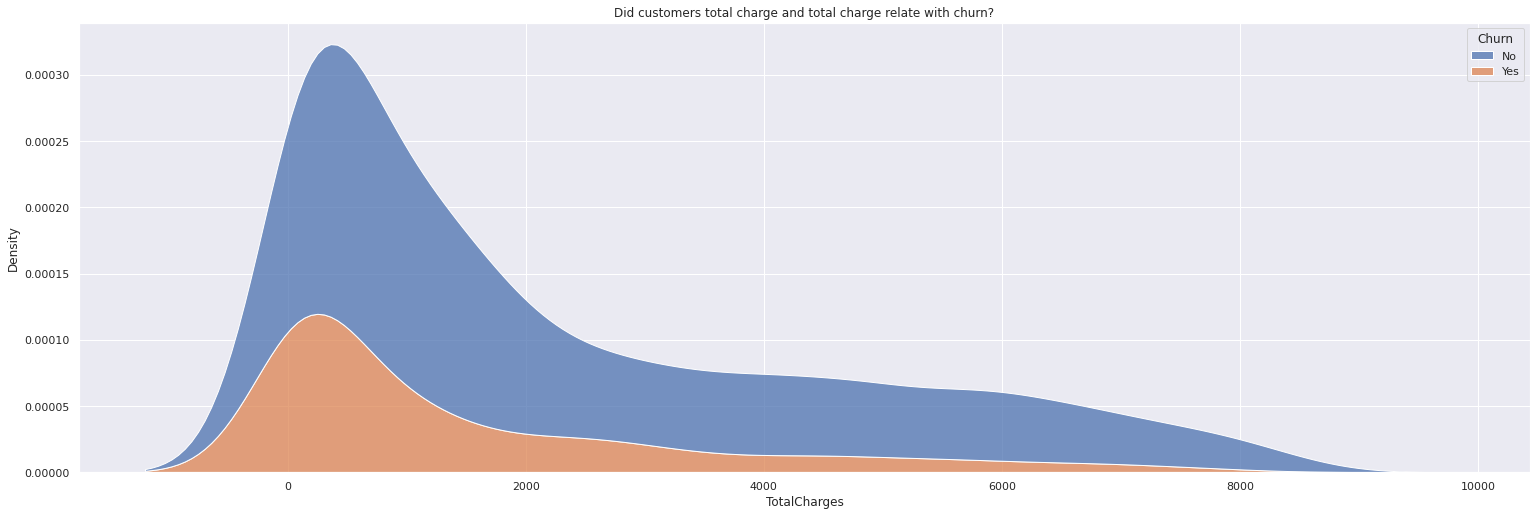

In [19]:
sns.set(rc={'figure.figsize':(26,8.27)})
sns.kdeplot(data=df_data, x="TotalCharges", hue="Churn", multiple="stack").set(title='Did customers total charge and total charge relate with churn?')

## Do customers opted for streaming, face issue with the service?

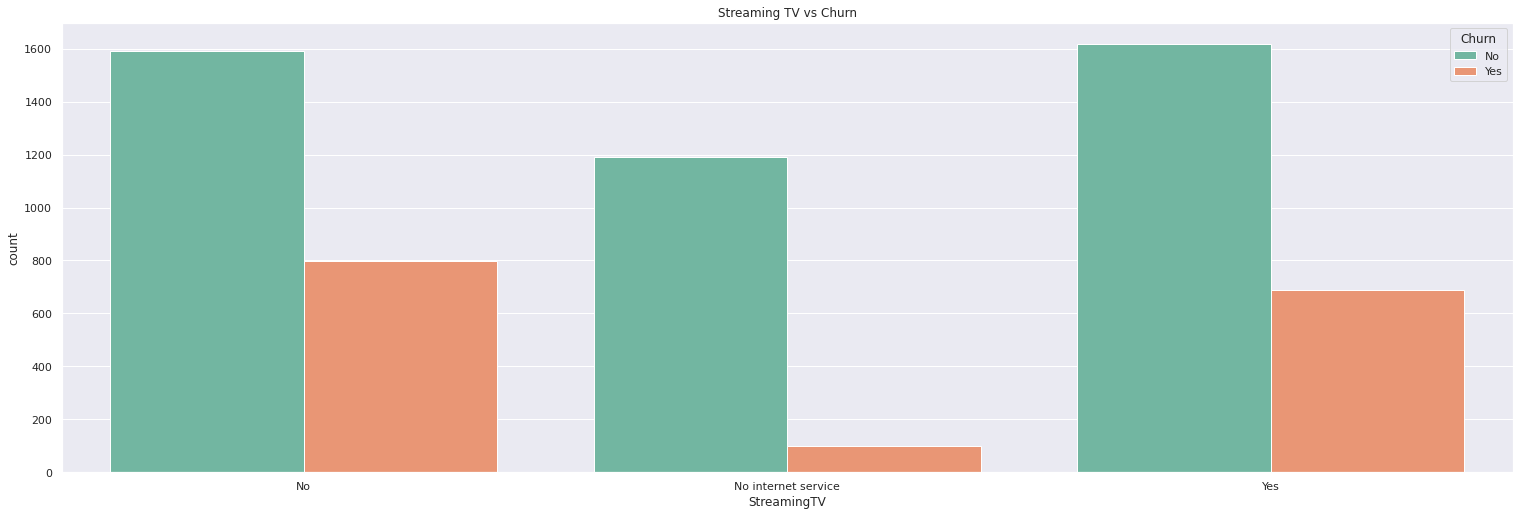

In [20]:
ax = sns.barplot(x="StreamingTV", y="count", hue='Churn', 
                 data=df_data.groupby(['Churn', 'StreamingTV']).size().reset_index(name='count'), palette="Set2").set(title='Streaming TV vs Churn')

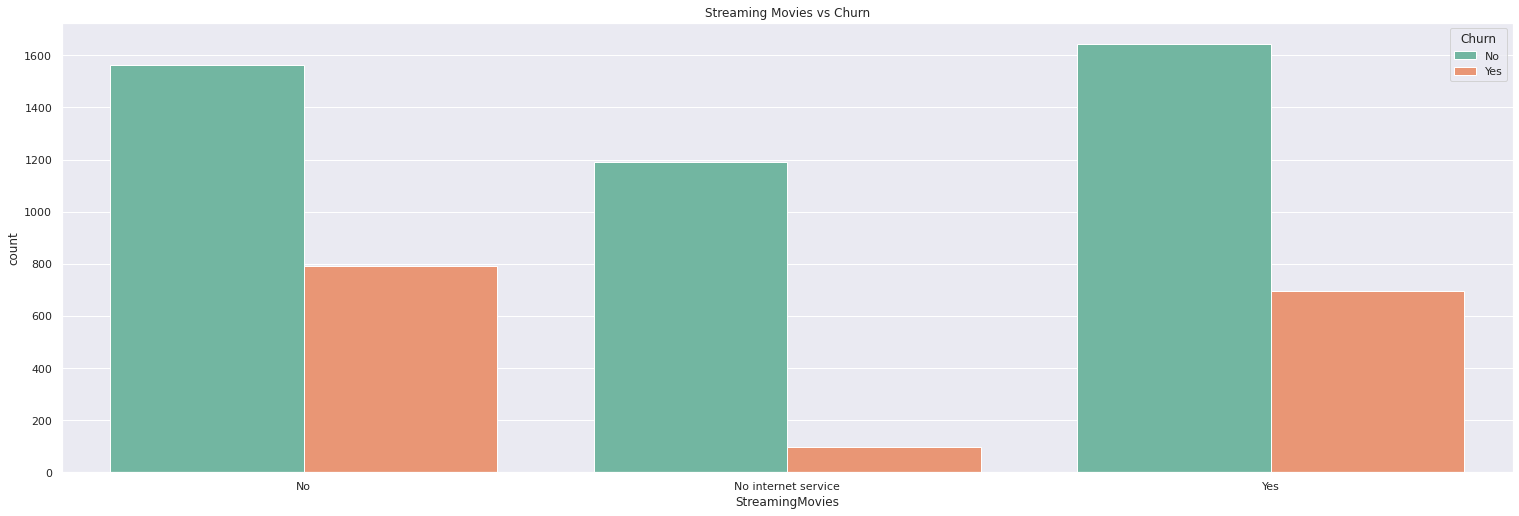

In [21]:
ax = sns.barplot(x="StreamingMovies", y="count", hue='Churn', 
                 data=df_data.groupby(['Churn', 'StreamingMovies']).size().reset_index(name='count'), 
                 palette="Set2").set(title='Streaming Movies vs Churn')

## Which contract do customers prefer in order to stay with the business?

In [22]:
fig = px.sunburst(df_data.groupby(['Contract', 'Churn']).size().reset_index(name='count'), 
                  path=['Contract', 'Churn'], values='count', title='Which contract do customers prefer in order to stay with the business?')
fig.show()

# Data Pre-processing

In [23]:
# List of categorical columns
cat_columns = ['gender', 'SeniorCitizen', 'Partner', 'PhoneService', 
               'MultipleLines', 'InternetService', 'OnlineSecurity', 
               'OnlineBackup', 'DeviceProtection',  'TechSupport',  
               'StreamingTV',  'StreamingMovies', 'Contract',
               'PaperlessBilling', 'PaymentMethod', 'Dependents']

![img1](https://github.com/SSaishruthi/Guvi_AI_For_India/raw/main/encoding.png)

In [24]:
# We can really quickly build dummy features with pandas by calling the get_dummies function. 
df_processed = pd.get_dummies(df_data, prefix_sep="__",
                              columns=cat_columns)

In [25]:
df_processed.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender__Female,gender__Male,SeniorCitizen__0,SeniorCitizen__1,Partner__No,Partner__Yes,PhoneService__No,PhoneService__Yes,MultipleLines__No,MultipleLines__No phone service,MultipleLines__Yes,InternetService__DSL,InternetService__Fiber optic,InternetService__No,OnlineSecurity__No,OnlineSecurity__No internet service,OnlineSecurity__Yes,OnlineBackup__No,OnlineBackup__No internet service,OnlineBackup__Yes,DeviceProtection__No,DeviceProtection__No internet service,DeviceProtection__Yes,TechSupport__No,TechSupport__No internet service,TechSupport__Yes,StreamingTV__No,StreamingTV__No internet service,StreamingTV__Yes,StreamingMovies__No,StreamingMovies__No internet service,StreamingMovies__Yes,Contract__Month-to-month,Contract__One year,Contract__Two year,PaperlessBilling__No,PaperlessBilling__Yes,PaymentMethod__Bank transfer (automatic),PaymentMethod__Credit card (automatic),PaymentMethod__Electronic check,PaymentMethod__Mailed check,Dependents__No,Dependents__Yes
0,72,24.10,1734.65,No,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1
1,44,88.15,3973.20,No,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0
2,38,74.95,2869.85,Yes,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0
3,4,55.90,238.50,No,0,1,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0
4,2,53.45,119.50,No,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0


Now we got the data with one hot encoded feature.

In [26]:
# Encode target column
# First let's see unique values in the target column
print('Before encoding:', df_processed['Churn'].unique())
# Encode target columns: Assign `Yes` to 1 and `No` to 0
df_processed["Churn"] = np.where(df_processed["Churn"].str.contains("Yes"), 1, 0)
print('After encoding:', df_processed['Churn'].unique())

Before encoding: ['No' 'Yes']
After encoding: [0 1]


Let's save the data transformation we did before so that we perform the same operation in the test dataset. If there is any drift in the data, we might have to re-train the model.

In [27]:
cat_dummies = [col for col in df_processed 
               if "__" in col 
               and col.split("__")[0] in cat_columns]
with open('cat_dummies.txt', 'w') as filehandle:
    for listitem in cat_dummies:
        filehandle.write('%s\n' % listitem)

In [28]:
processed_columns = list(df_processed.columns[:])
with open('processed_columns.txt', 'w') as filehandle:
    for listitem in processed_columns:
        filehandle.write('%s\n' % listitem)

In [29]:
# Looks like the dataset is imbalanced
df_processed['Churn'].value_counts()

0    4399
1    1587
Name: Churn, dtype: int64

### Choosing algorithms some tips!

- Explainability
- Memory: can you load your data fully? need incremental learning algorithms?
- Number of features
- Nonlinearity of the data
- Training speed
- Prediction speed

#### How to deal with data imbalance?

There are many ways to handle the dta imbalance.

- Choose a learning algorithm that provide weights for every class.
- Data-level approach: Under-sampling, Over-sampling, Cluster-based over sampling, Synthetic minority over-sampling technique (SMOTE)
- Algorithmic ensemble techniques
- Bagging techniques
- Boosting: Ada boost, Gradient Tree boosting, XG Boost/

- https://www.analyticsvidhya.com/blog/2017/03/imbalanced-data-classification/
- https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/

Here, we are using adaptive boosting technique in this example to deal with data imbalance.

#### An AdaBoost classifier.

Ada Boost is the first original boosting technique which creates a highly accurate prediction rule by combining many weak and inaccurate rules.  Each classifier is serially trained with the goal of correctly classifying examples in every round that were incorrectly classified in the previous round.

In [30]:
# Get only features
feature_df = df_processed.drop(['Churn'], axis=1)
# Extract target column 
target_df = df_processed[['Churn']]
# Split dataset into train and test (Best Practise is to split into train, validation, and test)
x_train,x_test,y_train,y_test = train_test_split(feature_df, target_df, test_size=0.2, random_state = 0)
# Initialize adaboost classifier
cls = AdaBoostClassifier(n_estimators=100)
# Fit the model
cls.fit(x_train, y_train)
# Predict and calculate metrics
print("Accuracy:", metrics.accuracy_score(y_test, cls.predict(x_test)))
print('Recall Score:', metrics.recall_score(y_test, cls.predict(x_test), average='weighted'))
print('Precision Score:', metrics.precision_score(y_test, cls.predict(x_test), average='weighted'))
print('F1 Score:', metrics.f1_score(y_test, cls.predict(x_test), average='weighted'))
print('Confusion matrix:', metrics.confusion_matrix(y_test, cls.predict(x_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy: 0.8063439065108514
Recall Score: 0.8063439065108514
Precision Score: 0.7978525894830667
F1 Score: 0.8001391971967932
Confusion matrix: [[794  89]
 [143 172]]


In [31]:
import pickle
# save the classifier
with open('classifier.pkl', 'wb') as fid:
    pickle.dump(cls, fid)    